In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [30]:
df=pd.read_csv("final_cleaned_file.csv")

In [3]:
df2=pd.read_csv("for customerID.csv")

In [31]:
df["Churn"]=df['Churn'].map({'No':0, 'Yes':1})
categorial_columns=df.select_dtypes('object').columns
df=pd.get_dummies(df,columns=categorial_columns,drop_first=True)
features = df.drop(columns ='Churn')
target = df['Churn']

In [32]:
features.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20,random_state=0, stratify=target)

In [6]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [8]:
sm = SMOTE(random_state = 0)
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

c:\Users\prodd\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\prodd\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\prodd\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\prodd\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

In [ ]:


adaboost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=200,
    learning_rate=0.1,
    random_state=0
)

adaboost_clf.fit(X_train_sm, y_train_sm)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=200, random_state=0)

In [10]:
pred_smote = adaboost_clf.predict(X_test_scaled)
print(classification_report(y_pred = pred_smote, y_true = y_test))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1035
           1       0.56      0.74      0.64       374

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.78      1409



In [12]:
proba_ada = adaboost_clf.predict_proba(X_test_scaled)[:,1]
proba_ada

array([0.17377174, 0.48808596, 0.73246898, ..., 0.15377558, 0.23855721,
       0.71303784])

In [13]:
preds_df = pd.DataFrame({
    
    "Churn_Probability": proba_ada
   
})
#preds_df.to_csv("churn_predictions.csv", index=False)


In [14]:
final=pd.concat([df2, preds_df], axis=1)


In [15]:
final.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Probability
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.173772
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0.488086
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.732469
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.424143
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.234617


In [16]:
final.to_csv("churn_predictions.csv", index=False)

TOP Customer with highest churn_probability

In [17]:
final["customerID"].nunique()

7043

In [18]:
final.shape

(7043, 22)

In [19]:
final.sort_values(by='Churn_Probability',ascending=False).head(10)[["customerID","Churn_Probability"]]

,customerID,Churn_Probability
307,4115-BNPJY,0.770370
914,6024-RUGGH,0.750384
96,9803-FTJCG,0.742550
157,2749-CTKAJ,0.740757
1086,8999-BOHSE,0.740599
595,0719-SYFRB,0.737888
572,5756-JYOJT,0.737148
1104,8717-VCTXJ,0.737148
249,0959-WHOKV,0.735326
1388,9089-UOWJG,0.734386


In [20]:
final.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Probability'],
      dtype='object')

In [21]:
final.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
Churn_Probability    float64
dtype: object

In [22]:
# Ensure numeric types
final['MonthlyCharges'] = pd.to_numeric(final['MonthlyCharges'], errors='coerce')
final['Churn_Probability'] = pd.to_numeric(final['Churn_Probability'], errors='coerce')

# Calculate annual revenue
final['customer_revenue'] = final['MonthlyCharges'] * 12

# Drop rows with missing values in either column
clean_df = final.dropna(subset=['Churn_Probability', 'customer_revenue'])

# Calculate expected loss
expected_loss = (clean_df['Churn_Probability'] * clean_df['customer_revenue']).sum()

print("Total Expected Revenue Loss:", expected_loss)

Total Expected Revenue Loss: 453425.31269082974


In [23]:

for reduction in [0.1, 0.2, 0.3]:  # 10%, 20%, 30% reduction
    saved = expected_loss * reduction
    print(f"Reducing churn by {int(reduction*100)}% saves: {saved:.2f}")


Reducing churn by 10% saves: 45342.53
Reducing churn by 20% saves: 90685.06
Reducing churn by 30% saves: 136027.59


In [24]:
def segment(row):
    if row['Churn_Probability'] >= 0.7:
        return "High Risk"
    elif row['Churn_Probability'] >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

final["customer_segment"]=final.apply(segment, axis=1)


In [25]:
final.to_csv("churn_predictions.csv", index=False)

In [27]:
from sklearn.inspection import permutation_importance
import pandas as pd

result = permutation_importance(adaboost_clf, X_test_scaled, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': result.importances_mean
}).sort_values('Importance', ascending=False)

print(importance_df)


AttributeError: 'Index' object has no attribute 'columns'

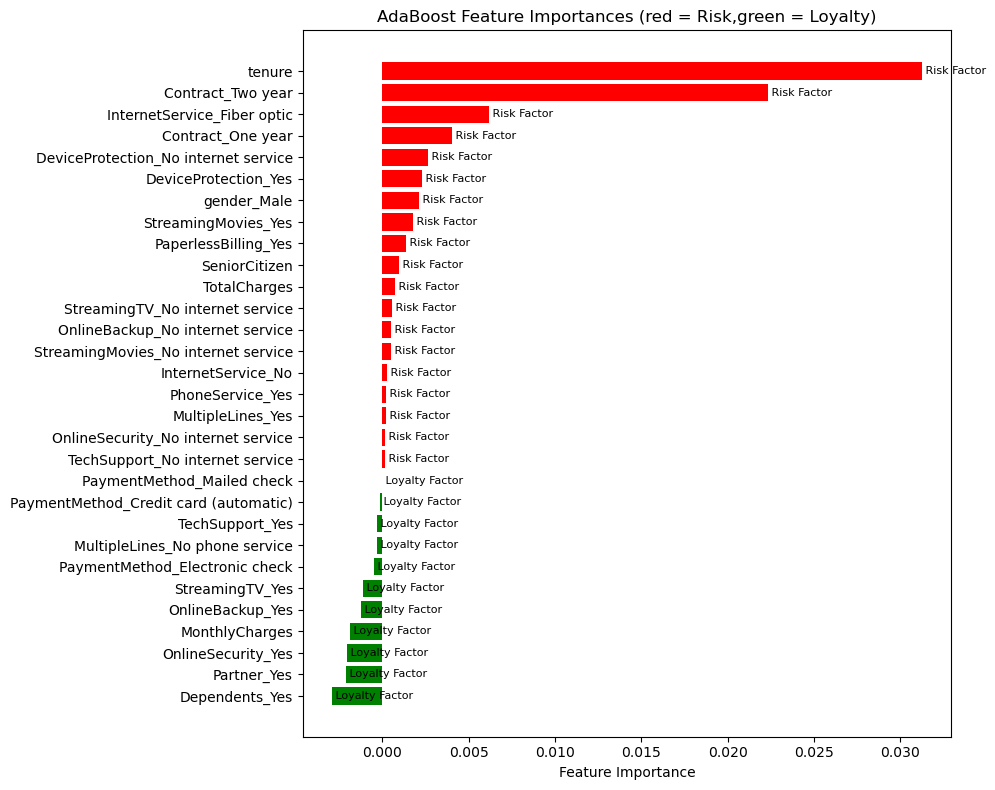

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance data
importance_data = {
    'Feature': [
        'tenure','Contract_Two year','InternetService_Fiber optic','Contract_One year',
        'DeviceProtection_No internet service','DeviceProtection_Yes','gender_Male',
        'StreamingMovies_Yes','PaperlessBilling_Yes','SeniorCitizen','TotalCharges',
        'StreamingTV_No internet service','StreamingMovies_No internet service',
        'OnlineBackup_No internet service','InternetService_No','MultipleLines_Yes',
        'PhoneService_Yes','TechSupport_No internet service','OnlineSecurity_No internet service',
        'PaymentMethod_Mailed check','PaymentMethod_Credit card (automatic)',
        'MultipleLines_No phone service','TechSupport_Yes','PaymentMethod_Electronic check',
        'StreamingTV_Yes','OnlineBackup_Yes','MonthlyCharges','OnlineSecurity_Yes',
        'Partner_Yes','Dependents_Yes'
    ],
    'Importance': [
        0.031228,0.022356,0.006175,0.004045,0.002626,0.002271,0.002129,
        0.001774,0.001348,0.000994,0.000710,0.000568,0.000497,0.000497,
        0.000284,0.000213,0.000213,0.000142,0.000142,0.000000,-0.000142,
        -0.000284,-0.000284,-0.000497,-0.001136,-0.001207,-0.001845,
        -0.002058,-0.002129,-0.002910
    ]
}

# Create DataFrame
importance_df = pd.DataFrame(importance_data)

# Sort by importance
importance_df = importance_df.sort_values('Importance', ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10,8))
colors = importance_df['Importance'].apply(lambda x: 'red' if x > 0 else 'green')
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)

# Add labels for clarity
for i, (imp, feat) in enumerate(zip(importance_df['Importance'], importance_df['Feature'])):
    label = "Risk Factor" if imp > 0 else "Loyalty Factor"
    plt.text(imp, i, f" {label}", va='center', color='black', fontsize=8)

plt.xlabel("Feature Importance")
plt.title("AdaBoost Feature Importances (red = Risk,green = Loyalty)")
plt.tight_layout()
plt.show()